# Importing important Libararies

In [329]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [330]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (12, 6)

In [331]:
import warnings
warnings.simplefilter(action="ignore",  category=FutureWarning)

# Loading Data

In [332]:
original_data = pd.read_csv("loan_data.csv")
df = original_data.copy()
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [333]:
df.shape

(5000, 14)

# Dropping useless features(columns)

In [334]:
df.drop(["ID", "ZIPCode"], axis=1, inplace=True)

# Data Types

In [335]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Handling NAN values

In [336]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

# Removing Outliers

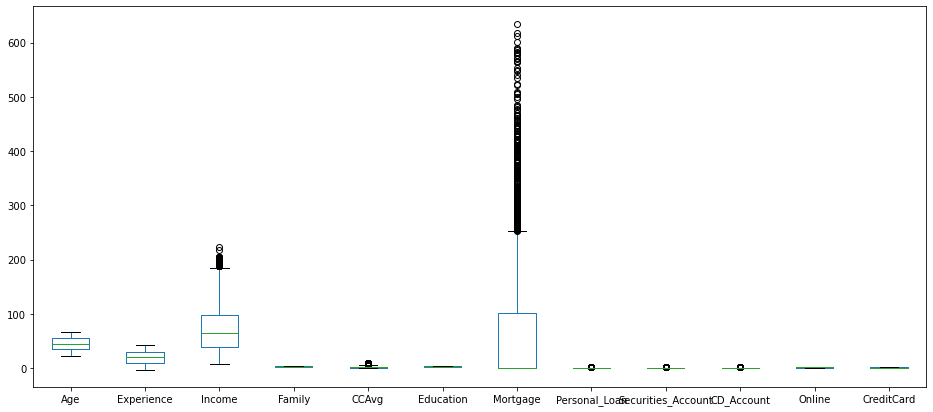

In [337]:
df.plot(kind="box", figsize=(16, 7))

In [338]:
index = df[df["Income"] > 175].index
df.drop(index, axis=0, inplace=True)

In [339]:
index = df[df["Mortgage"] > 220].index
df.drop(index, axis=0, inplace=True)

In [340]:
index = df[df["CCAvg"] > 5].index
df.drop(index, axis=0, inplace=True)

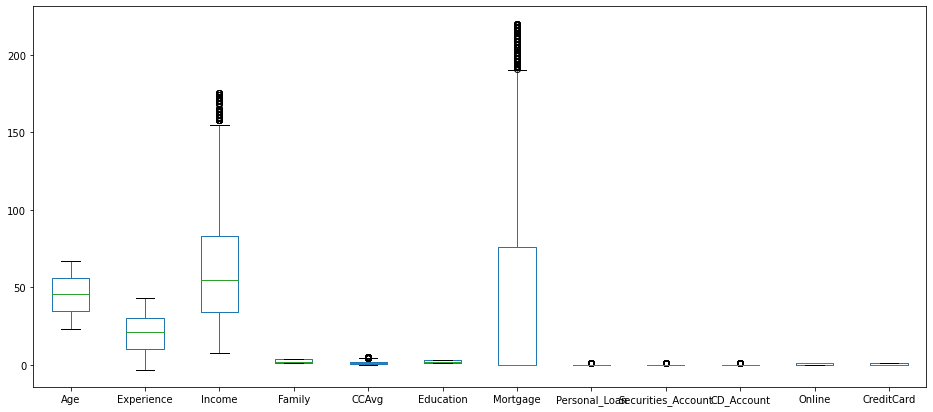

In [341]:
df.plot(kind="box", figsize=(16, 7))

In [342]:
df.shape

(4225, 12)

In [343]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Univariate Visualization

In [344]:
def Annotate(plot, feature):
        l = len(feature)
        
        for p in ax.patches:
            per = "{:.1f}%".format(100 * p.get_height()/l)
            x = p.get_x() + p.get_width()/2- 0.02
            y = p.get_y() + p.get_height()
            ax.annotate(per, (x, y), size=13)
        plt.show()

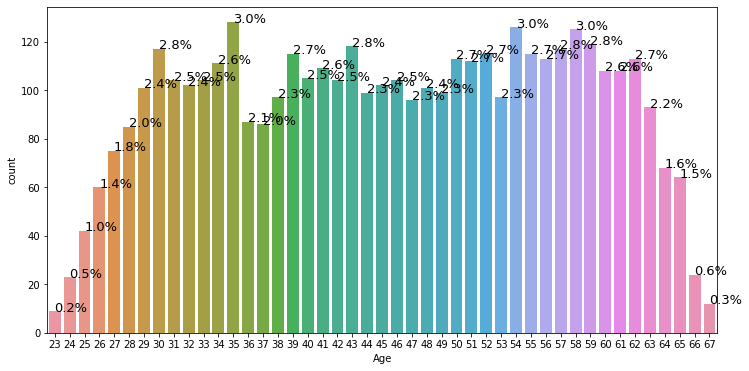

In [345]:
ax = sns.countplot(df.Age)
Annotate(ax, df.Age)

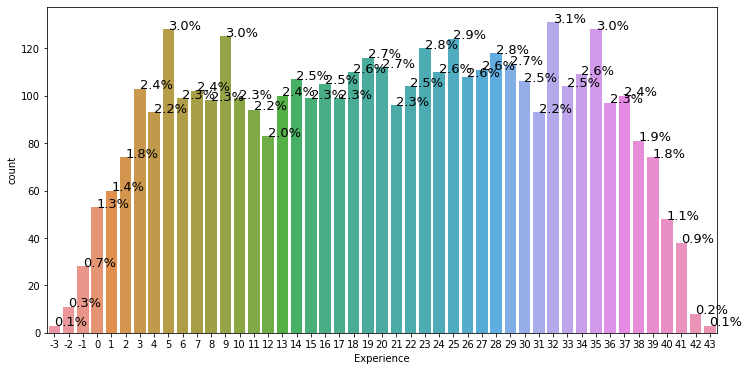

In [346]:
ax = sns.countplot(df.Experience)
Annotate(ax, df.Experience)

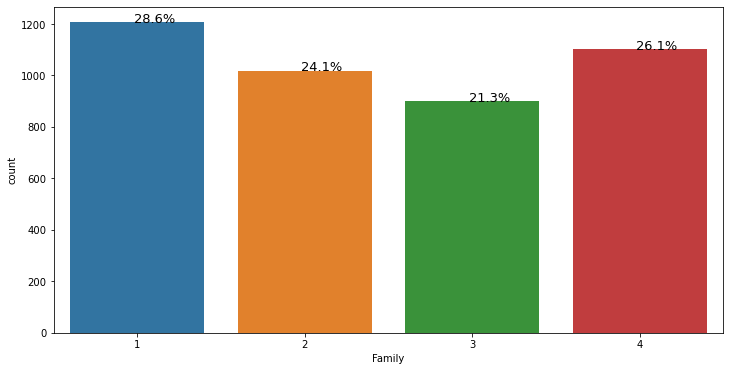

In [347]:
ax = sns.countplot(df.Family)
Annotate(ax, df.Family)

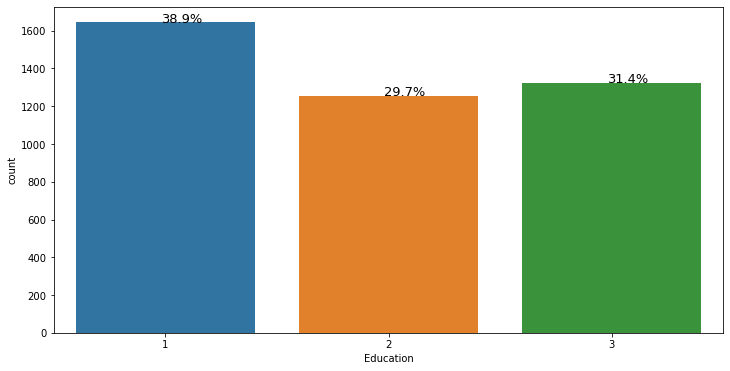

In [348]:
ax = sns.countplot(df.Education)
Annotate(ax, df.Education)

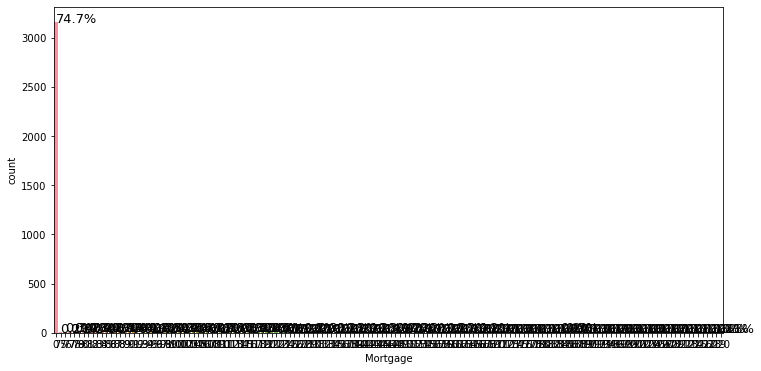

In [349]:
ax = sns.countplot(df.Mortgage)
Annotate(ax, df.Mortgage)

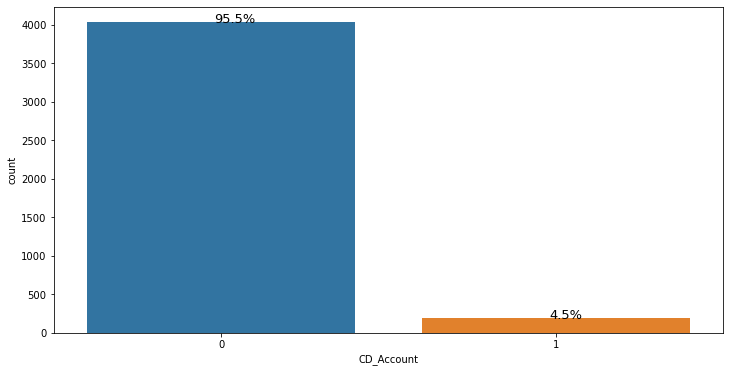

In [350]:
ax = sns.countplot(df.CD_Account)
Annotate(ax, df.CD_Account)

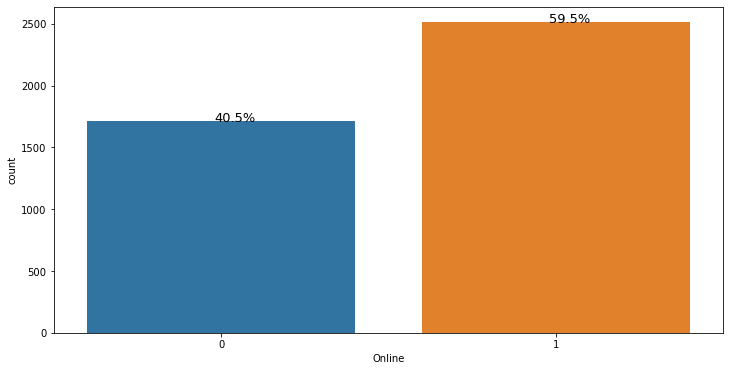

In [351]:
ax = sns.countplot(df.Online)
Annotate(ax, df.Online)

Most borrower tooks online loan

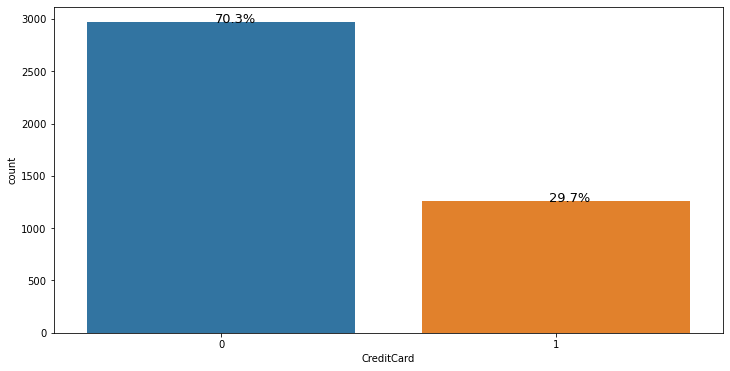

In [352]:
ax = sns.countplot(df.CreditCard)
Annotate(ax, df.CreditCard)

Mostly has Credit Card

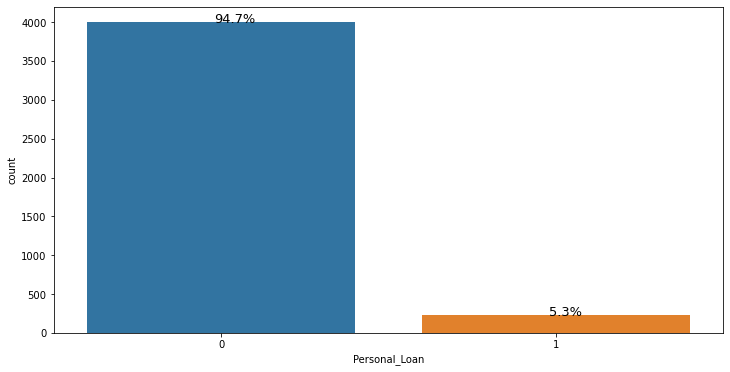

In [353]:
ax = sns.countplot(df.Personal_Loan)
Annotate(ax, df.Personal_Loan)

Almost 95% borrowers took loan

# Bivariate Analysis

In [354]:
def stackplot(data):
    tab1 =  pd.crosstab(data, df.Personal_Loan, margins=True)
    print(tab1)
    print("="*126)
    
    l = len(data)
    
    tab2 = pd.crosstab(data, df.Personal_Loan, normalize="index")
    tab2.plot(kind="bar", stacked=True)
    plt.show()

Personal_Loan     0    1   All
Family                        
1              1149   58  1207
2               968   50  1018
3               839   60   899
4              1043   58  1101
All            3999  226  4225


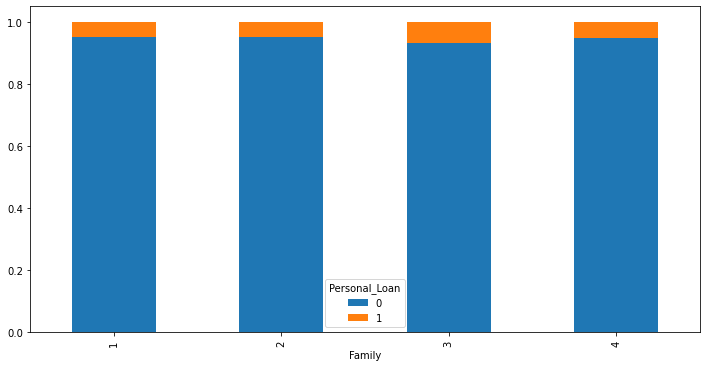

In [355]:
stackplot(df.Family)

In [356]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Personal_Loan     0    1   All
Education                     
1              1602   43  1645
2              1166   89  1255
3              1231   94  1325
All            3999  226  4225


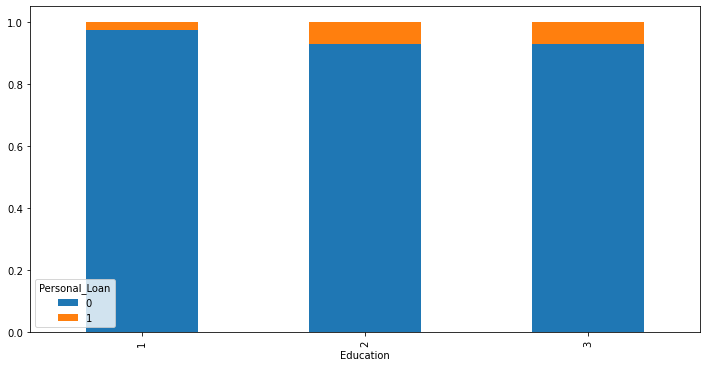

In [357]:
stackplot(df.Education)

Personal_Loan          0    1   All
Securities_Account                 
0                   3585  198  3783
1                    414   28   442
All                 3999  226  4225


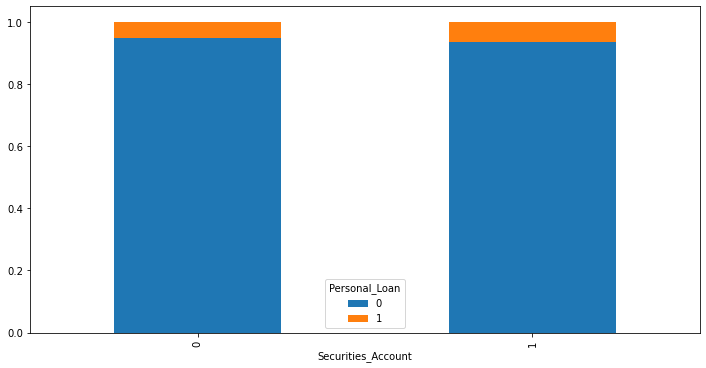

In [358]:
stackplot(df.Securities_Account)

Personal_Loan     0    1   All
CreditCard                    
0              2806  163  2969
1              1193   63  1256
All            3999  226  4225


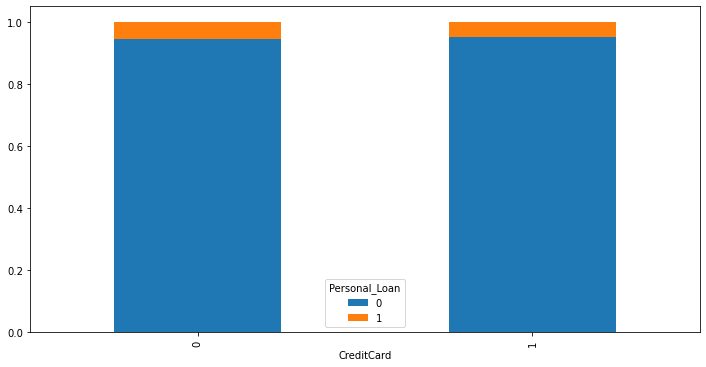

In [359]:
stackplot(df.CreditCard)

Personal_Loan     0    1   All
CD_Account                    
0              3862  172  4034
1               137   54   191
All            3999  226  4225


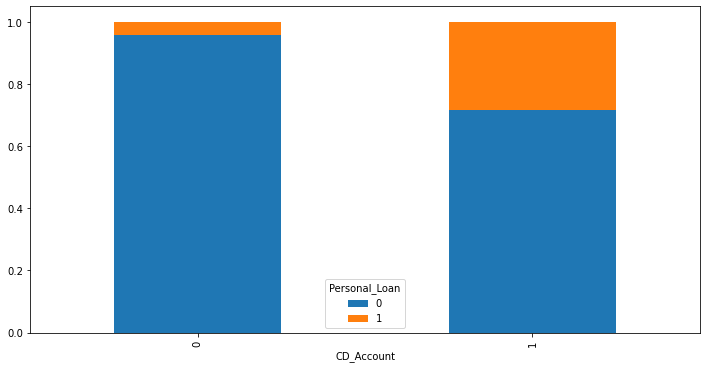

In [360]:
stackplot(df.CD_Account)

More Peoples having CD_Account get loan

Personal_Loan     0    1   All
Online                        
0              1610  101  1711
1              2389  125  2514
All            3999  226  4225


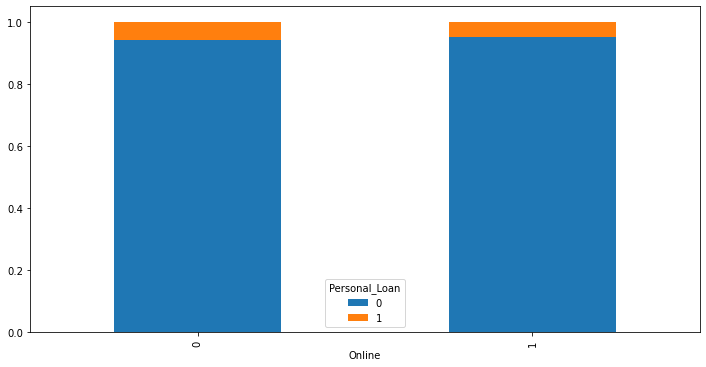

In [361]:
stackplot(df.Online)

## Result:

* CD_Account seems to have some relation with Personal Loan

# Hypothesis to check relation between varibles

In [362]:
import scipy.stats as stats

tab1 = pd.crosstab(df.CD_Account, df.Personal_Loan, margins=True)

Ho = "CD_Account has no relation with Personal Loan"
Ha = "CD_Account has a  relation with Personal Loan"

chi2, p, dof, ex = stats.chi2_contingency(tab1)
if(p<0.05):
    print(f"{Ha} with P_Value {p.round(3)}")
else:
    print(f"{Ho} with P_Value {p.round(3)}")

CD_Account has a  relation with Personal Loan with P_Value 0.0


In [363]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Data Preparation for building model

In [364]:
x = df.drop("Personal_Loan", axis=1)
y = df.Personal_Loan

In [365]:
cat = x.drop(["Age", "Income", "CCAvg", "Mortgage"], axis=1)

In [366]:
categ_col = cat.columns
categ_col

Index(['Experience', 'Family', 'Education', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [367]:
x[categ_col] = x[categ_col].astype("category")
x.dtypes

Age                      int64
Experience            category
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object

In [368]:
x = pd.get_dummies(x, drop_first=True)

In [369]:
print("Feature Data is \n", x.head())
print("\nTarget Data is \n", y.head())

Feature Data is 
    Age  Income  CCAvg  Mortgage  Experience_-2  Experience_-1  Experience_0  \
0   25      49    1.6         0              0              0             0   
1   45      34    1.5         0              0              0             0   
2   39      11    1.0         0              0              0             0   
3   35     100    2.7         0              0              0             0   
4   35      45    1.0         0              0              0             0   

   Experience_1  Experience_2  Experience_3  ...  Experience_43  Family_2  \
0             1             0             0  ...              0         0   
1             0             0             0  ...              0         0   
2             0             0             0  ...              0         0   
3             0             0             0  ...              0         0   
4             0             0             0  ...              0         0   

   Family_3  Family_4  Education_2  Educatio

So feature & target data is ready to feed the model so let's create a model

# Splitting data into Train, Test

In [370]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=42)

# Model Creation

In [394]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fitting model for Non-Normalized Data

In [372]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [373]:
print("Score on Training Data is ", model.score(x_train, y_train))
print("Score on Test Data is ", model.score(x_test, y_test))

Score on Training Data is  1.0
Score on Test Data is  0.9818611987381703


# Fitting model for Normalized Data

In [386]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(x)

MinMaxScaler()

In [387]:
x_train_mms = mms.transform(x_train)
x_test_mms = mms.transform(x_test)

In [388]:
model_mms = DecisionTreeClassifier(criterion="gini", random_state=1)
model_mms.fit(x_train_mms, y_train)

DecisionTreeClassifier(random_state=1)

In [389]:
score_mms_test = model_mms.score(x_test_mms, y_test)
score_mms_train = model_mms.score(x_train_mms, y_train)
print("Model Score for Normalized Training Data is ", score_mms_train)
print("Model Score for Normalized Test Data is ", score_mms_test)

Model Score for Normalized Training Data is  1.0
Model Score for Normalized Test Data is  0.9818611987381703


# Fitting model for Standardized Data

In [390]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [391]:
x_train_ss = ss.transform(x_train_mms)
x_test_ss = ss.transform(x_test_mms)

In [392]:
model_ss = DecisionTreeClassifier(criterion="gini", random_state=1)
model_ss.fit(x_train_ss, y_train)

DecisionTreeClassifier(random_state=1)

In [393]:
score_ss_train = model_ss.score(x_train_ss, y_train)
score_ss_test = model_ss.score(x_test_ss, y_test)
print("Model Score for Standardized Training Data is ", score_ss_train)
print("Model Score for Standardized Test Data is ", score_ss_test)

Model Score for Standardized Training Data is  1.0
Model Score for Standardized Test Data is  0.9818611987381703
